# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "weather_api_key"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | tura
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | mao
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | tolanaro
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | ciudad lazaro cardenas
Processing Record 16 of Set 1 | curillo
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | muntok
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | sal rei
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,18.09,63,75,2.06,CA,1724008666
1,ilulissat,69.2167,-51.1000,6.01,70,75,3.09,GL,1724008667
2,tura,25.5198,90.2201,23.29,98,79,2.01,IN,1724008668
3,kingston,17.9970,-76.7936,33.53,66,40,7.72,JM,1724008669
4,albany,42.6001,-73.9662,23.68,80,100,4.00,US,1724008510


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,18.09,63,75,2.06,CA,1724008666
1,ilulissat,69.2167,-51.1000,6.01,70,75,3.09,GL,1724008667
2,tura,25.5198,90.2201,23.29,98,79,2.01,IN,1724008668
3,kingston,17.9970,-76.7936,33.53,66,40,7.72,JM,1724008669
4,albany,42.6001,-73.9662,23.68,80,100,4.00,US,1724008510


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

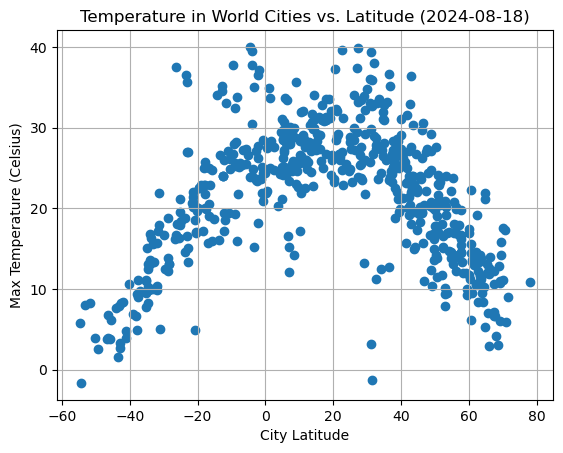

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.title('Temperature in World Cities vs. Latitude (2024-08-18)')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

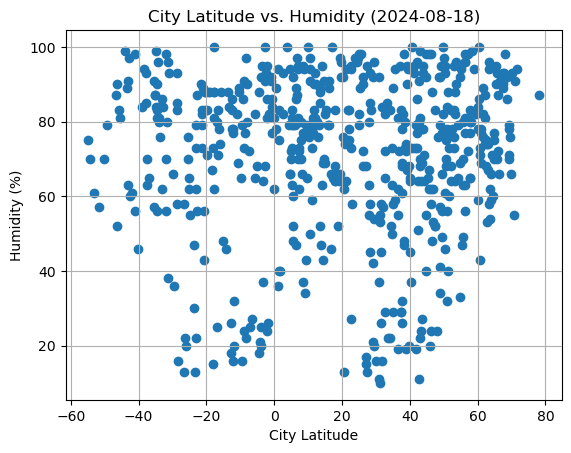

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-08-18)')
plt.xlabel('City Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

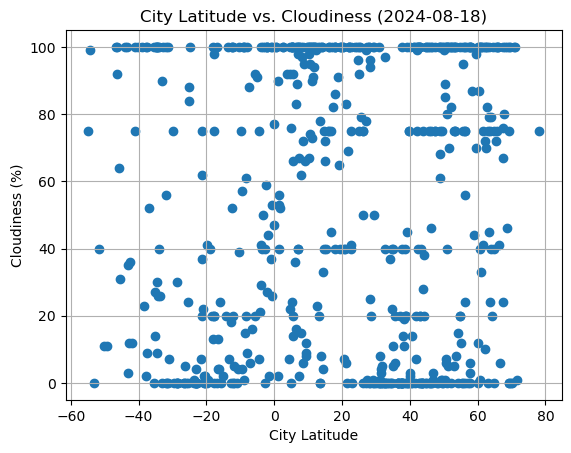

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-08-18)')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

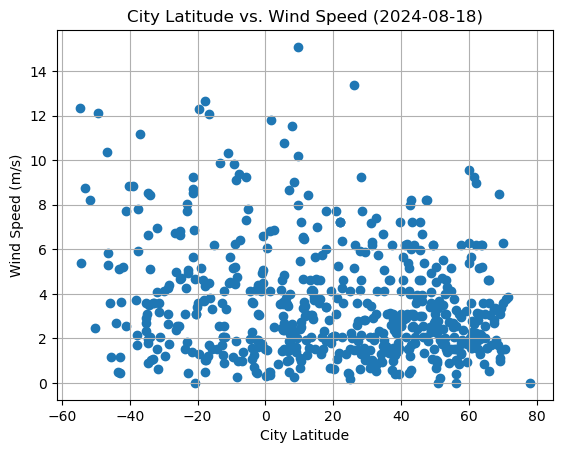

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-08-18)')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,18.09,63,75,2.06,CA,1724008666
1,ilulissat,69.2167,-51.1000,6.01,70,75,3.09,GL,1724008667
2,tura,25.5198,90.2201,23.29,98,79,2.01,IN,1724008668
3,kingston,17.9970,-76.7936,33.53,66,40,7.72,JM,1724008669
4,albany,42.6001,-73.9662,23.68,80,100,4.00,US,1724008510


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df['Lat']) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,atafu village,-8.5421,-172.5159,28.24,77,15,9.12,TK,1724008674
9,west island,-12.1568,96.8225,25.99,78,20,4.12,CC,1724008676
10,tolanaro,-25.0319,46.9987,21.20,65,84,6.82,MG,1724008678
11,blackmans bay,-43.0167,147.3167,2.63,91,35,0.45,AU,1724008679
12,new norfolk,-42.7826,147.0587,3.29,97,12,1.15,AU,1724008681


###  Temperature vs. Latitude Linear Regression Plot

the r^2 value is:-0.6770510584805687


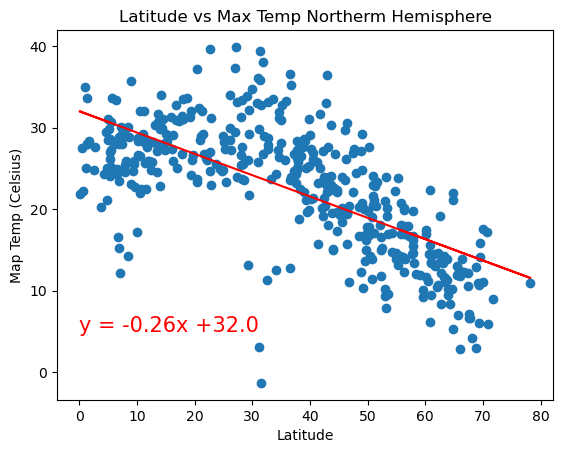

In [44]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(0,5), fontsize=15, color='red',)
plt.title('Latitude vs Max Temp Northerm Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Map Temp (Celsius)')

print(f'the r^2 value is:{rvalue}')
plt.show()

the r^2 value is:0.8086363895970936


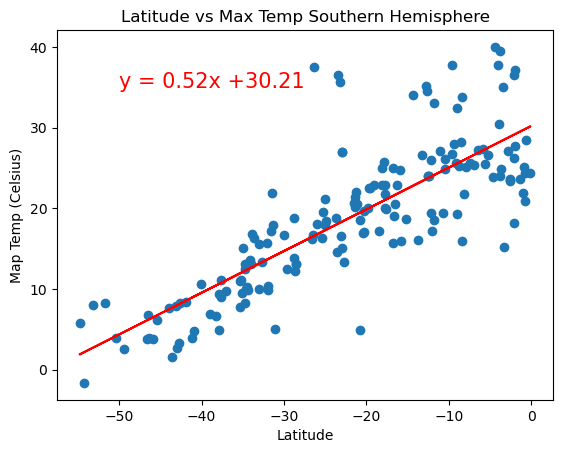

In [47]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-50, 35), fontsize=15, color='red',)
plt.title('Latitude vs Max Temp Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Map Temp (Celsius)')

print(f'the r^2 value is:{rvalue}')
plt.show()

**Discussion about the linear relationship:** In the northern Hemisphere there is a moderately positive relationship. In the Southern Hemisphere the is a highly correlated relationship. Therefore, for either hemisphere there is a strong correlation to Max Temp and Latitude as you head towards the equator.

### Humidity vs. Latitude Linear Regression Plot

the r^2 value is:0.03249622469915266


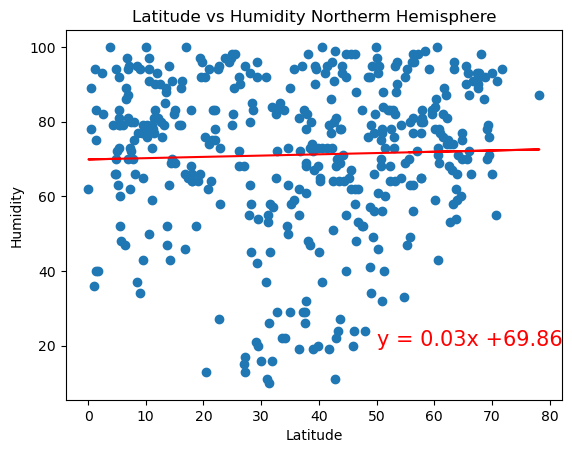

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(50,20), fontsize=15, color='red',)
plt.title('Latitude vs Humidity Northerm Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f'the r^2 value is:{rvalue}')
plt.show()

the r^2 value is:-0.1331035207522641


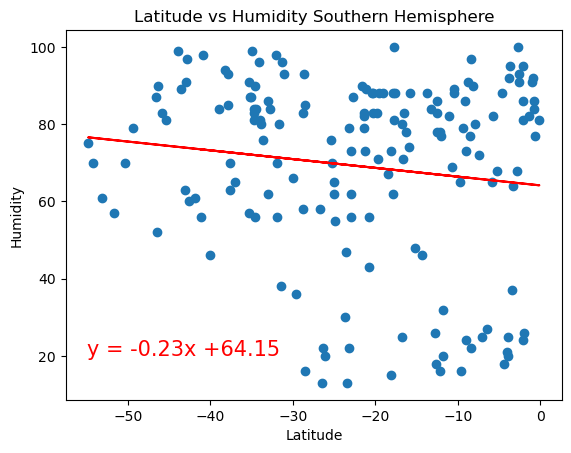

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-55,20), fontsize=15, color='red',)
plt.title('Latitude vs Humidity Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f'the r^2 value is:{rvalue}')
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a positive correlation and in the Southern a Negative Correlation, although there are both weak and have little to no correlation. The relationship between Humidity and Latitude in either Hemisphere is very week.

### Cloudiness vs. Latitude Linear Regression Plot

the r^2 value is:-0.08088198470295038


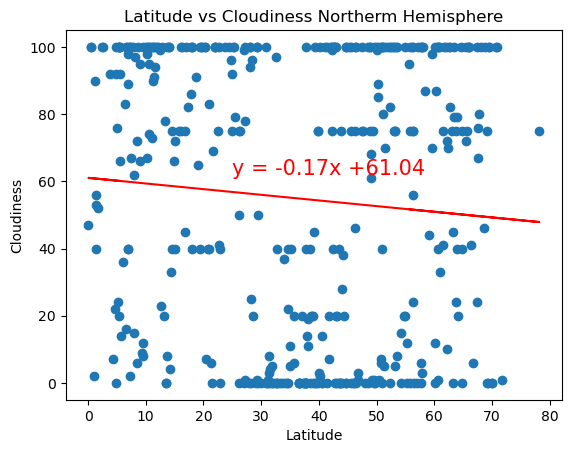

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(25,62), fontsize=15, color='red',)
plt.title('Latitude vs Cloudiness Northerm Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f'the r^2 value is:{rvalue}')
plt.show()

the r^2 value is:-0.017759605410326566


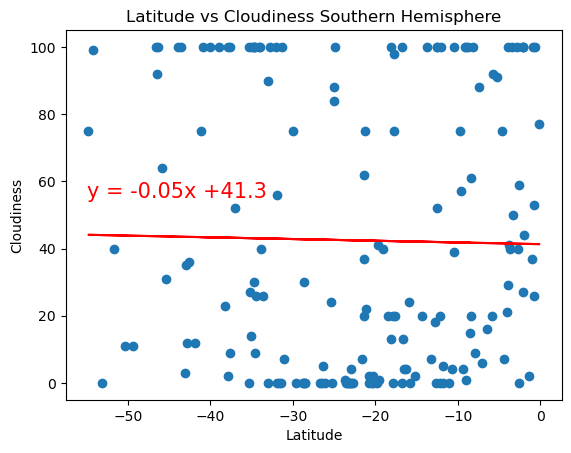

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-55,55), fontsize=15, color='red',)
plt.title('Latitude vs Cloudiness Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f'the r^2 value is:{rvalue}')
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemisphere there is a negative correlation. Also, they're both weak and so little to no correlation. Additionally noted, that the scatter plot shows a wide varience, this could be due to the elevation of Cities and their cloudiness, impacting the relationship on this graph. 

### Wind Speed vs. Latitude Linear Regression Plot

the r^2 value is:-0.10262870111823806


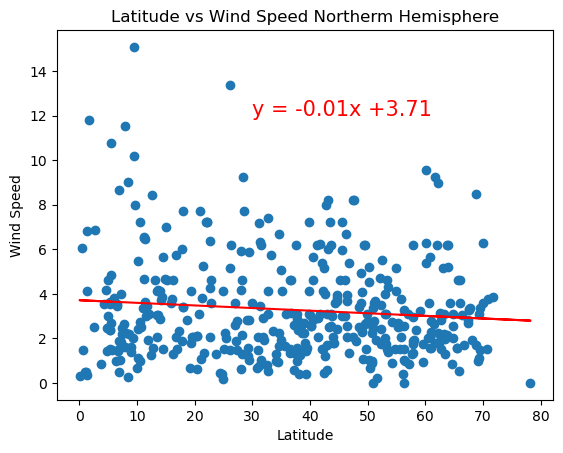

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(30,12), fontsize=15, color='red',)
plt.title('Latitude vs Wind Speed Northerm Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'the r^2 value is:{rvalue}')
plt.show()

the r^2 value is:-0.1680414365126041


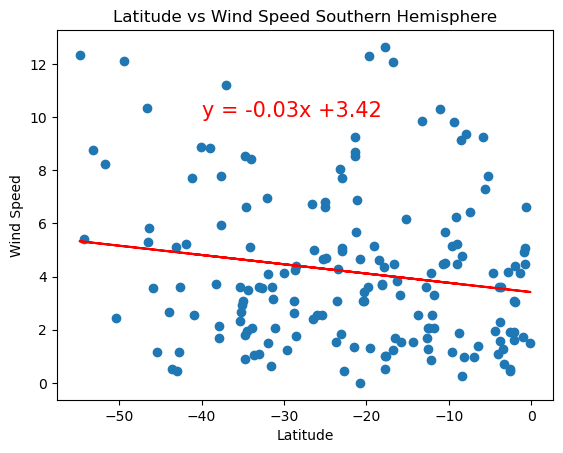

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, marker='o')
plt.plot(x_values,regress_values, 'r-')
plt.annotate(line_eq,(-40,10), fontsize=15, color='red',)
plt.title('Latitude vs Wind Speed Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f'the r^2 value is:{rvalue}')
plt.show()

**Discussion about the linear relationship:** There is a negative relationship in both Northern and Southern Hemisphere. There Correlation is little and weak, although the the rvalue in the Southern hemisphere is slightly stronger showing there is more correlation, yet weak, then the northern hemisphere when it comes to Windspead and Latitude. 